In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# import data
credit_card_df = pd.read_csv('Resources/card_transdata.csv')
credit_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
credit_card_df.shape

(1000000, 8)

In [5]:
credit_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# input missing values
credit_card_df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Exploratory Data Analysis

In [7]:
eda_df = credit_card_df.copy()

In [8]:
# normalize data
scaler_eda = MinMaxScaler()
eda_df[eda_df.columns] = scaler_eda.fit_transform(eda_df)
eda_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


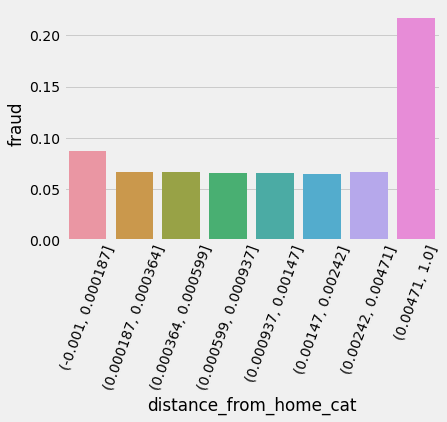

In [9]:
eda_df['distance_from_home_cat'] = pd.qcut(eda_df.distance_from_home,8)
bar = eda_df.groupby(by='distance_from_home_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

The probability of fraud remains constant as the distance from home increases but at a certain distance, the probability spikes to its maximum value, the probability goes from 5% to 35%.

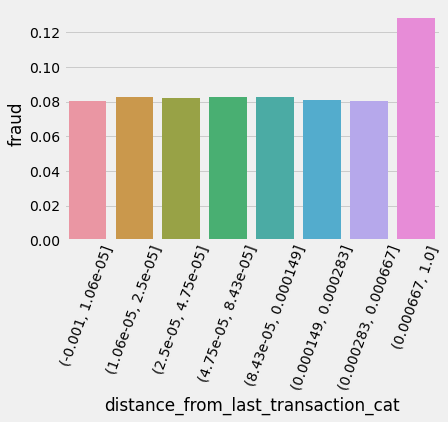

In [10]:
eda_df['distance_from_last_transaction_cat'] = pd.qcut(eda_df.distance_from_last_transaction,8)
bar = eda_df.groupby(by='distance_from_last_transaction_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

As the distance from last transaction increases, fraud increases too.

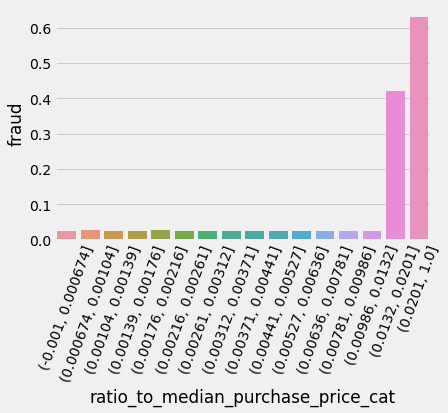

In [11]:
eda_df['ratio_to_median_purchase_price_cat'] = pd.qcut(eda_df.ratio_to_median_purchase_price,16)
bar = eda_df.groupby(by='ratio_to_median_purchase_price_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

The probability of fraud remains constant as the distance increases but at a certain distance, the probability spikes from less than 3% all the way to 40% and then to more than 60%. Therefore, higher ratio to median purchase price increases the probability of fraud.

## Relationship with categorical variables

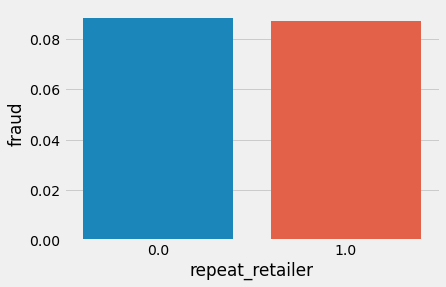

In [12]:
bar = eda_df.groupby(by='repeat_retailer').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

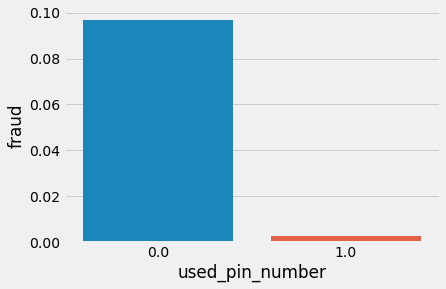

In [13]:
bar = eda_df.groupby(by='used_pin_number').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

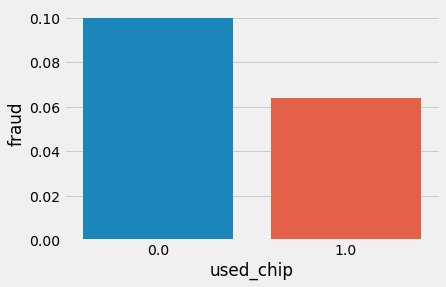

In [14]:
bar = eda_df.groupby(by='used_chip').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

The above graphs reveal that repeat retailer don't affect the probability of a transaction being fraud and that used pin number transactions are less likely to be a fraud, while used chip transactions are more likely to be a fraud.

## Building Machine Learning Model

In [15]:
x = credit_card_df.drop(["fraud"], axis=1)
y = credit_card_df['fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [16]:
# train a logistic regression model print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.9588346666666666
Testing Data Score: 0.958748


In [18]:
# train a random forest classifier model and print the model score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
print(f'Training Score: {classifier.score(x_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(x_test_scaled, y_test)}')

Training Score: 0.910076
Testing Score: 0.91136


C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
